In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.tsa.api as smt

from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller



%matplotlib inline

In [4]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv", index_col=0, parse_dates=True)["Count"]
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv", index_col=0, parse_dates=True)["Count"]
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv", index_col=0, parse_dates=True)["Count"]
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv", index_col=0, parse_dates=True)["Deg"]
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv", index_col=0, parse_dates=True)["Close"]
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv", index_col=0, parse_dates=True)["Count"]

In [5]:
all_series = {
    "Monthly sales of company X": sales_of_company_x,
    "Monthly Boston armed robberies": robberies_in_boston,
    "International airline passengers: monthly totals in thousands": airlines_passengers,
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp,
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing,
    "Daily total female births in California": female_births
}

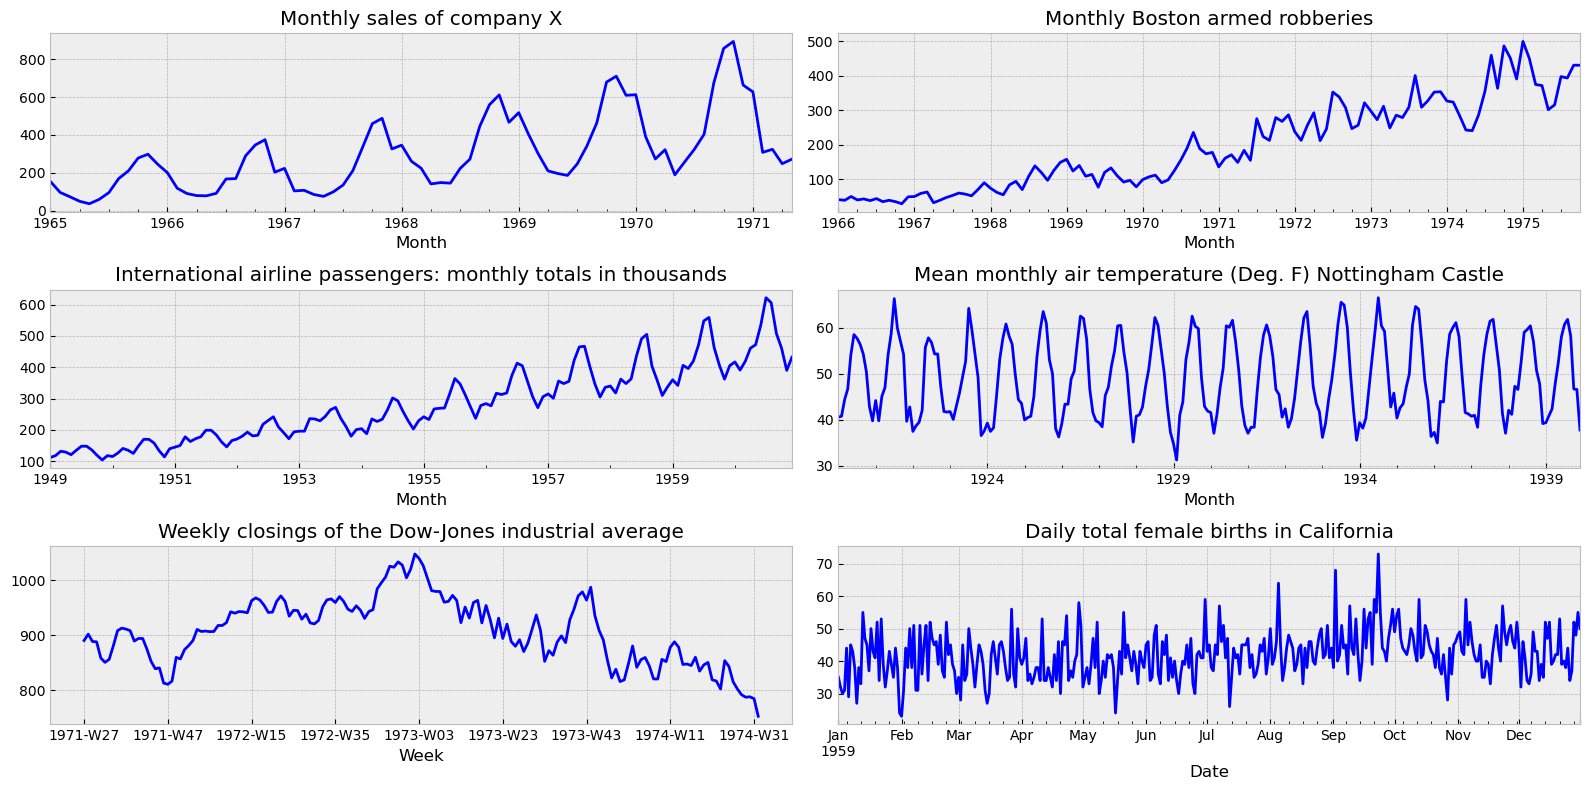

In [6]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [7]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)


def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [8]:
for key, value in all_series.items():
    print(key)
    test_stationarity(value)
    # tsplot(value)
    print("\n")

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


Monthly Boston armed robberies
Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Crit

Как видно, и тест Дики-Фуллера не отвергают гипотезу о нестационарности ряда 1,2,3,5. Если с рождаемостью(6 график) понятно, то с месячной температурой замка(4 график) есть вопросы. Построю корелаграмму для обоих графиков


Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


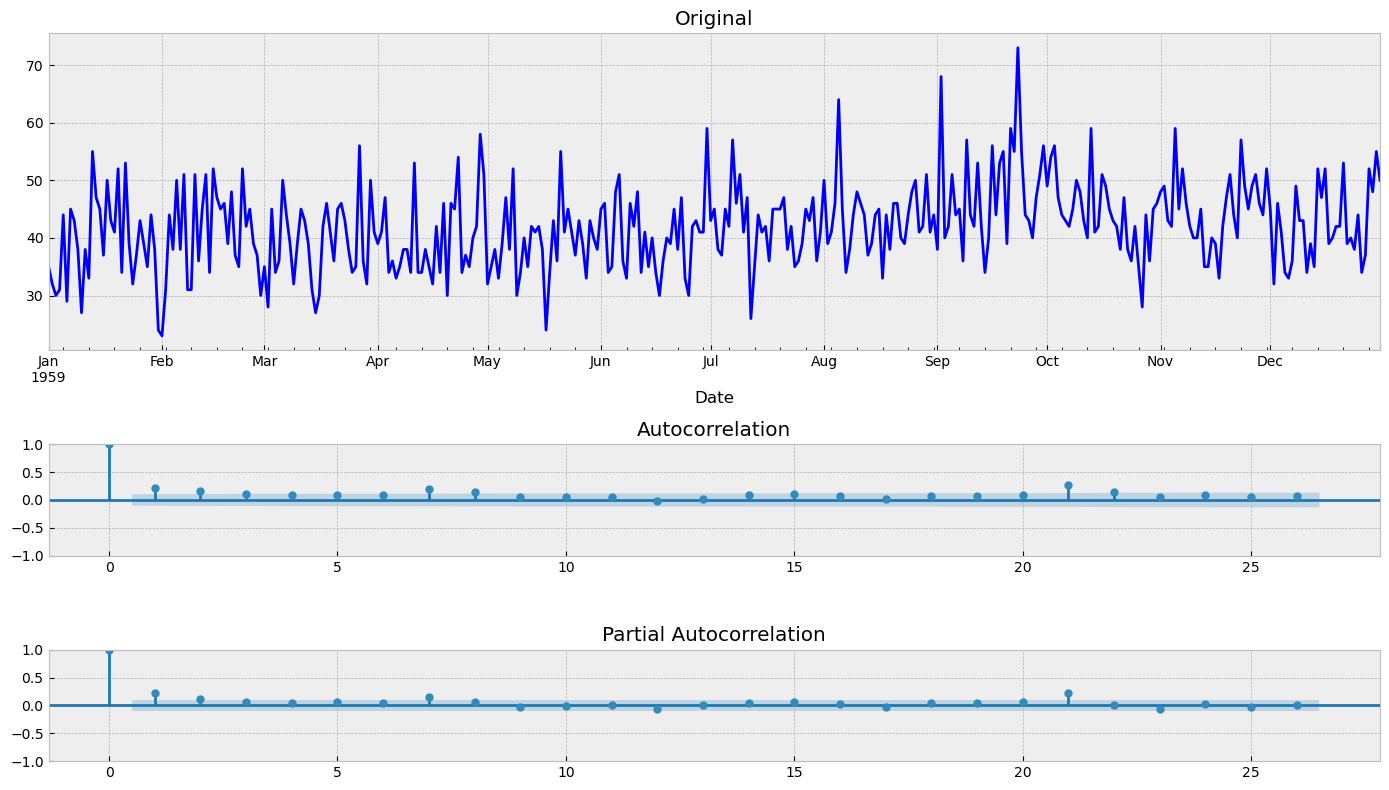

In [9]:
tsplot(all_series["Daily total female births in California"])

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


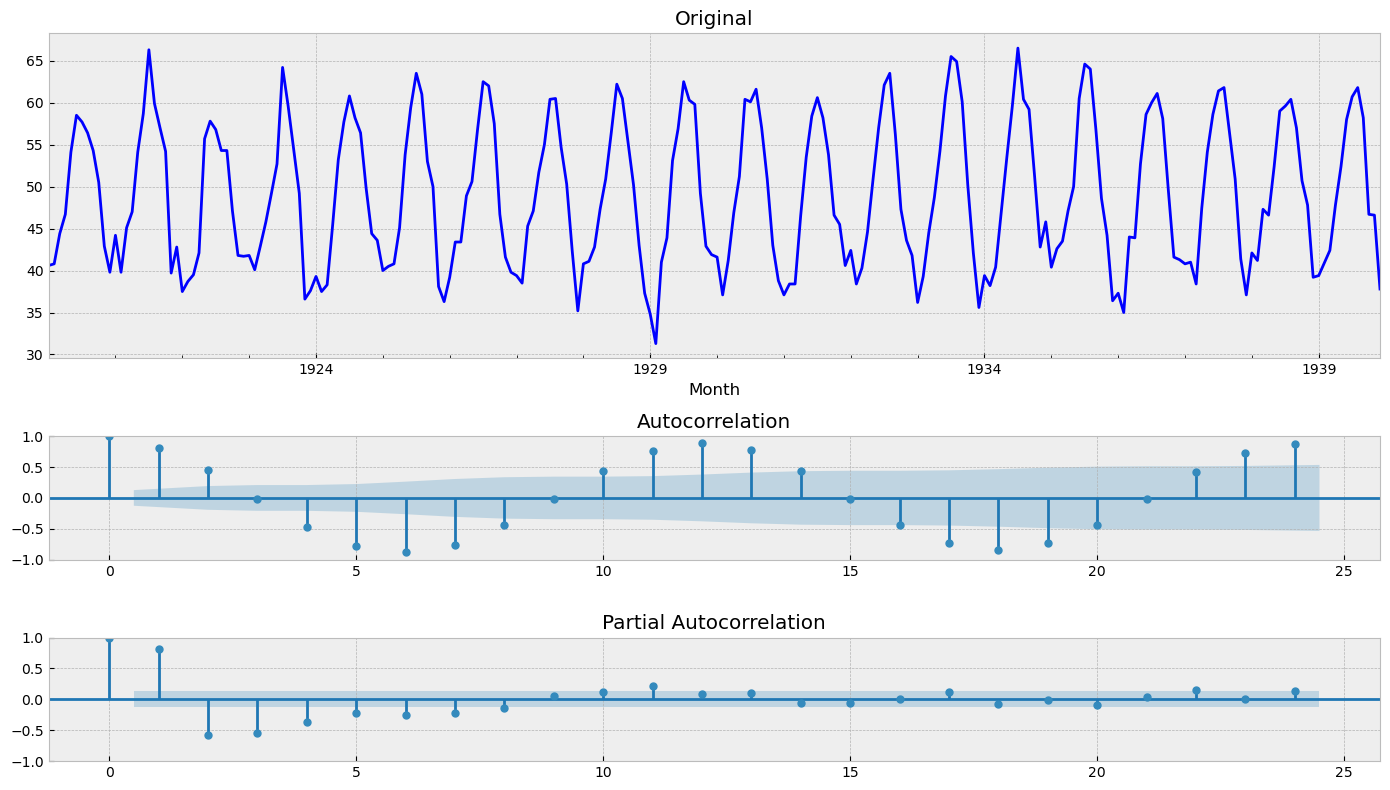

In [10]:
tsplot(all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"])

График корелограммы доказывает, что имеется сезонность, а значит график не стационарен 

In [17]:
series = all_series["Mean monthly air temperature (Deg. F) Nottingham Castle"]
# series = series[1:] - series[:-1]
# tsplot(series)

In [25]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Декомпозиция временного ряда
decomposition = seasonal_decompose(series, period=12, extrapolate_trend='freq')

# Получаем компоненты
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Убираем сезонность
series_deseasonalized = series - seasonal

Results of Dickey-Fuller Test:
Test Statistic                -8.502546e+00
p-value                        1.227190e-13
#Lags Used                     1.000000e+00
Number of Observations Used    2.380000e+02
Critical Value (1%)           -3.458128e+00
Critical Value (5%)           -2.873762e+00
Critical Value (10%)          -2.573283e+00
dtype: float64


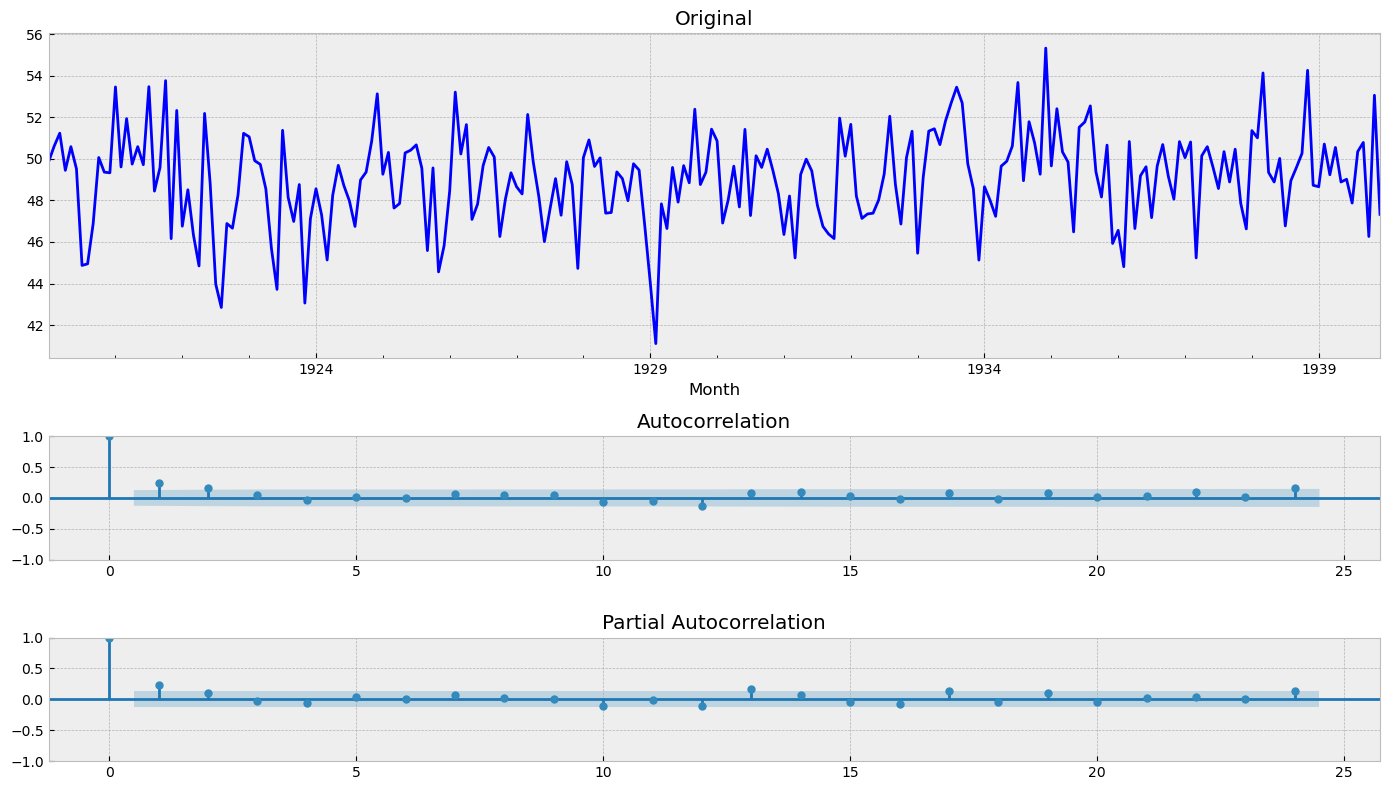

In [26]:
tsplot(series_deseasonalized)

ряд привели к стационарному

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


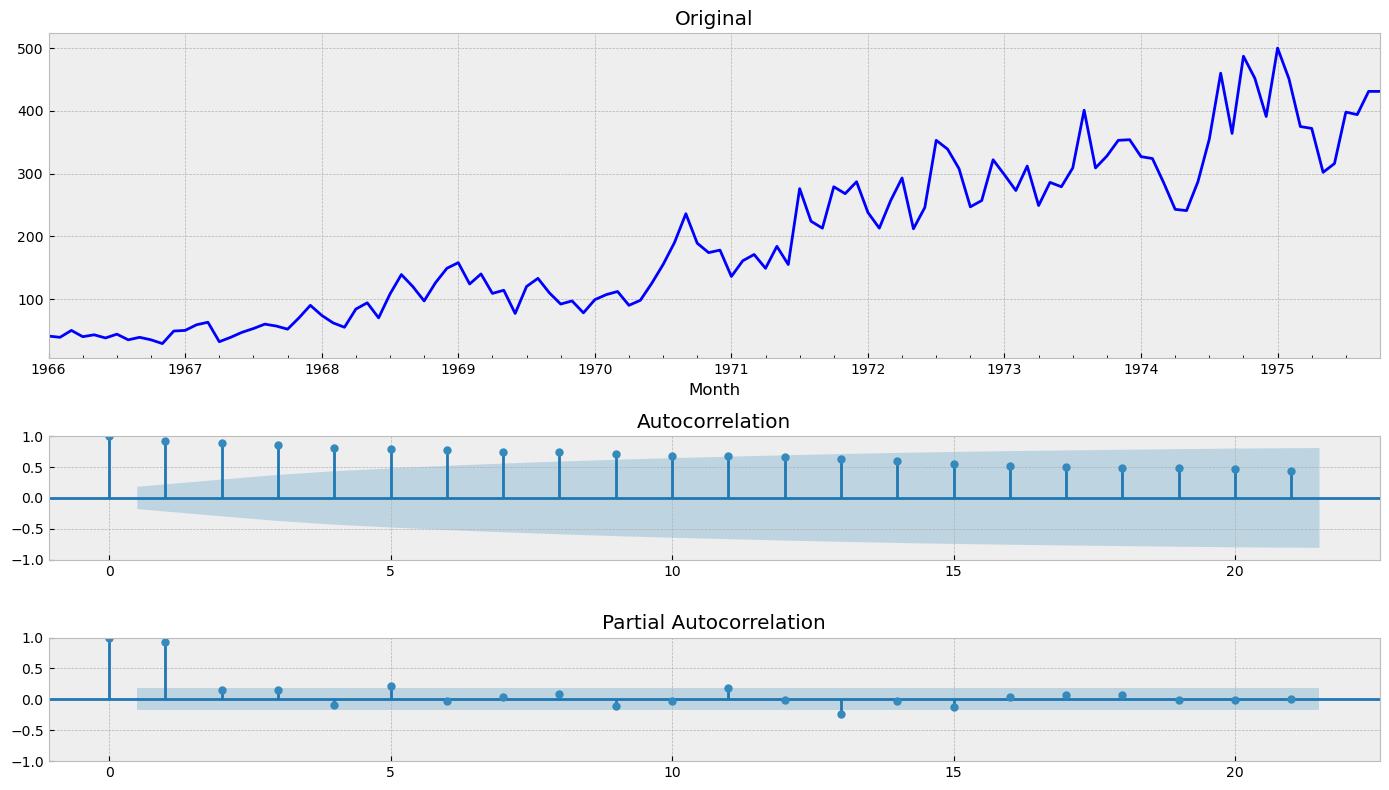

In [31]:
series = all_series["Monthly Boston armed robberies"]
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -7.428564e+00
p-value                        6.450795e-11
#Lags Used                     1.000000e+01
Number of Observations Used    1.060000e+02
Critical Value (1%)           -3.493602e+00
Critical Value (5%)           -2.889217e+00
Critical Value (10%)          -2.581533e+00
dtype: float64


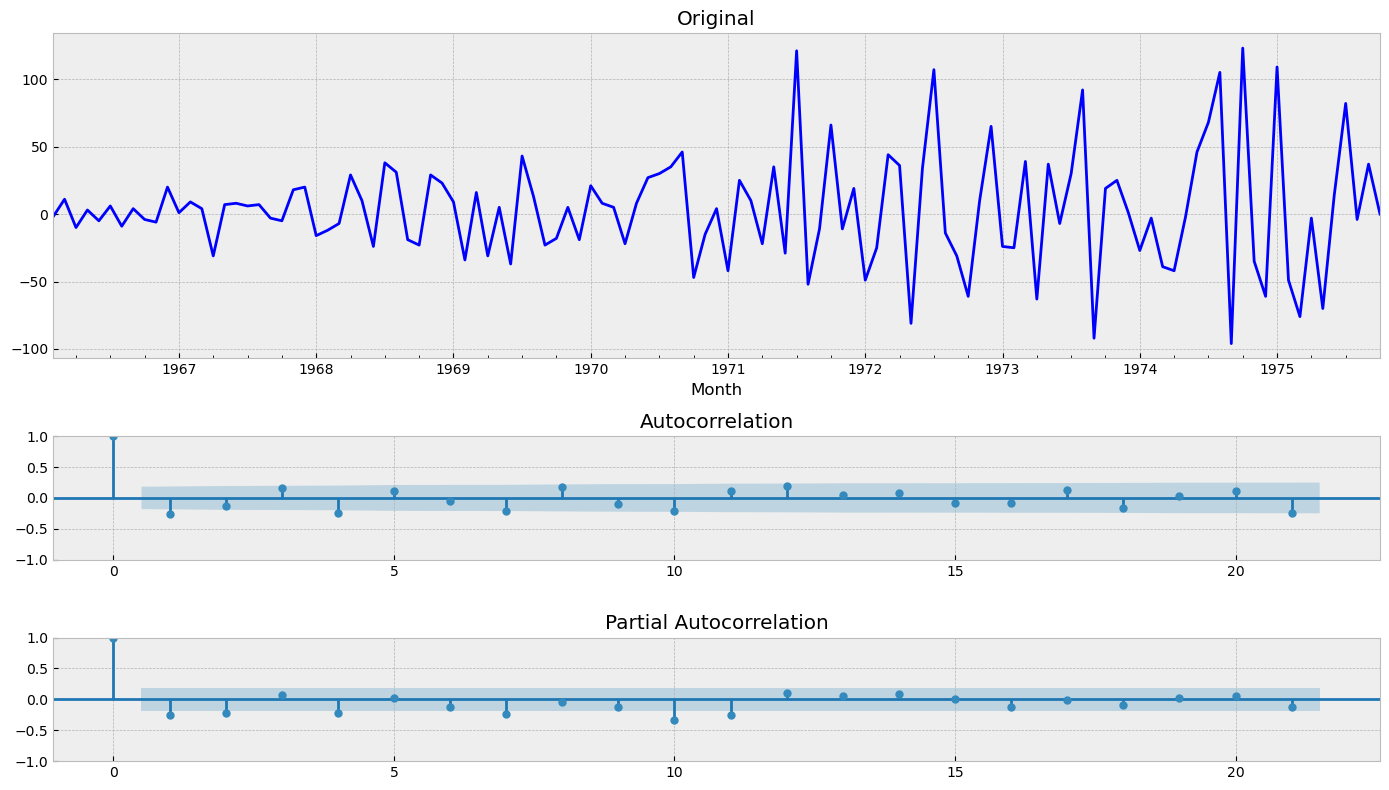

In [32]:
series_diff = series.diff().dropna()  # Убираем тренд
tsplot(series_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -5.479427
p-value                         0.000002
#Lags Used                      0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


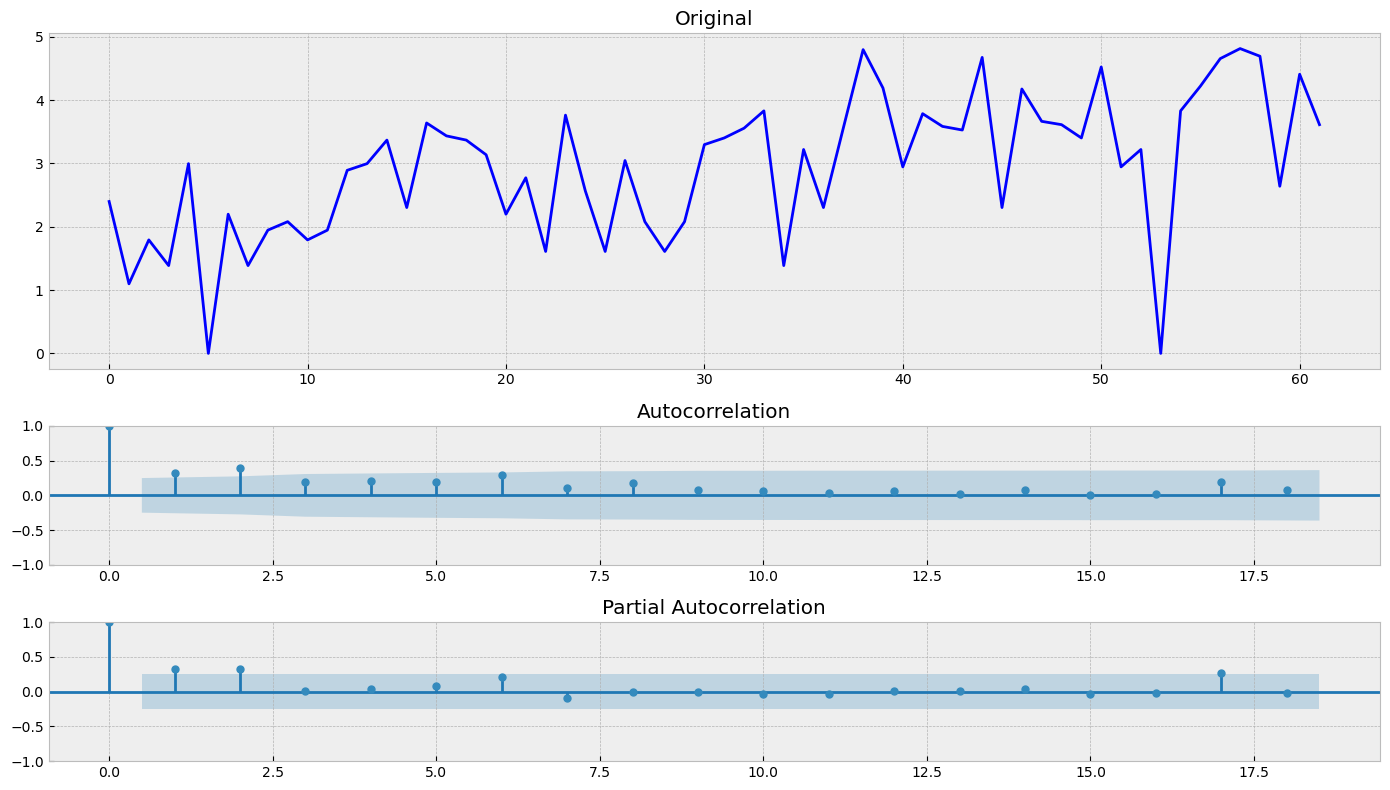

In [38]:
import numpy as np

series_log = boxcox(series_diff, 0)
mask = ~(np.isnan(series_log) | np.isinf(series_log))
data_clean = series_log[mask]
tsplot(data_clean)

сделал преобразование бокса кокса, уменьшил дисперсию

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


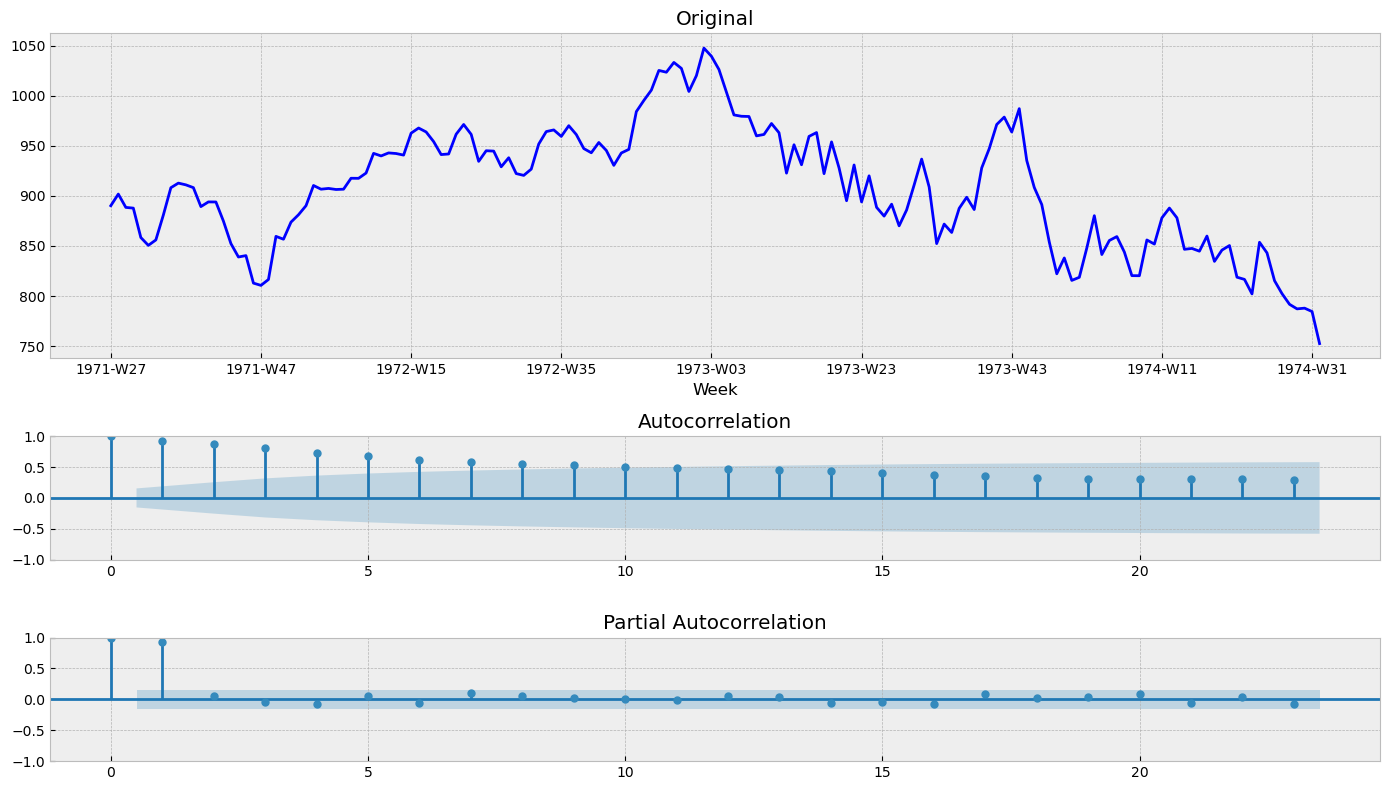

In [39]:
series = all_series["Weekly closings of the Dow-Jones industrial average"]
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                 -1.109255
p-value                         0.711367
#Lags Used                      8.000000
Number of Observations Used    67.000000
Critical Value (1%)            -3.531955
Critical Value (5%)            -2.905755
Critical Value (10%)           -2.590357
dtype: float64


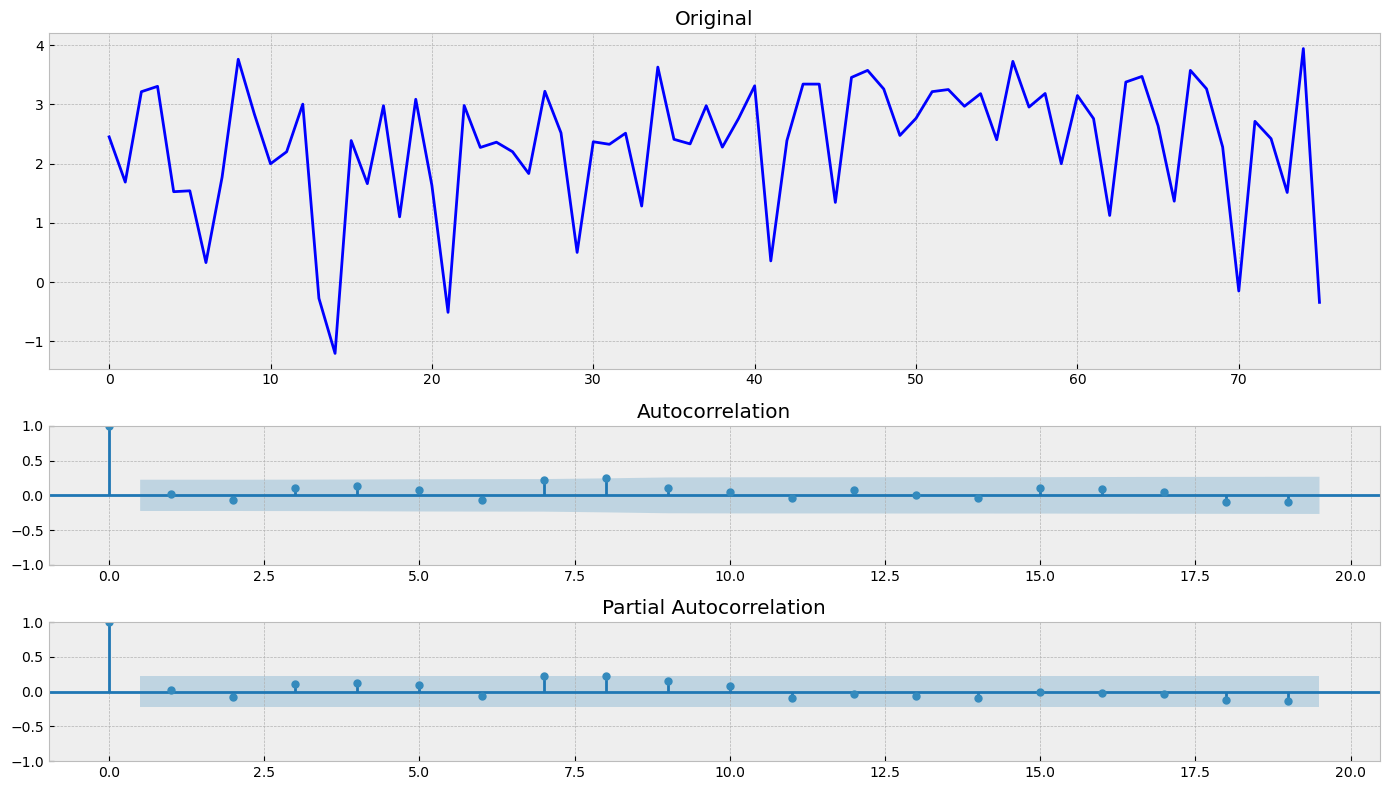

In [42]:
series_diff = series.diff().dropna()  # Убираем тренд
series_log = boxcox(series_diff, 0)
mask = ~(np.isnan(series_log) | np.isinf(series_log))
data_clean = series_log[mask]
tsplot(data_clean)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


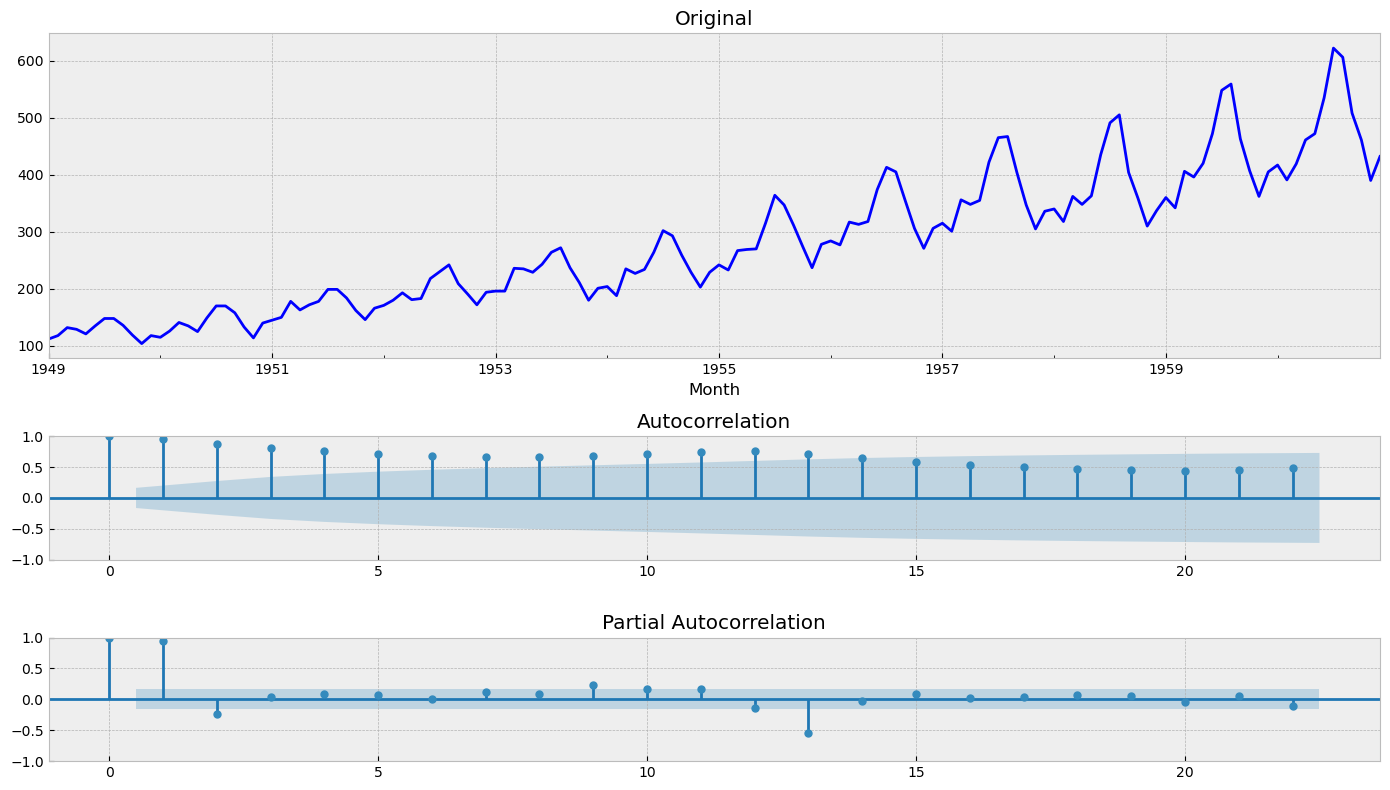

In [43]:
series = all_series["International airline passengers: monthly totals in thousands"]
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                  -5.295682
p-value                          0.000006
#Lags Used                       0.000000
Number of Observations Used    126.000000
Critical Value (1%)             -3.483346
Critical Value (5%)             -2.884766
Critical Value (10%)            -2.579156
dtype: float64


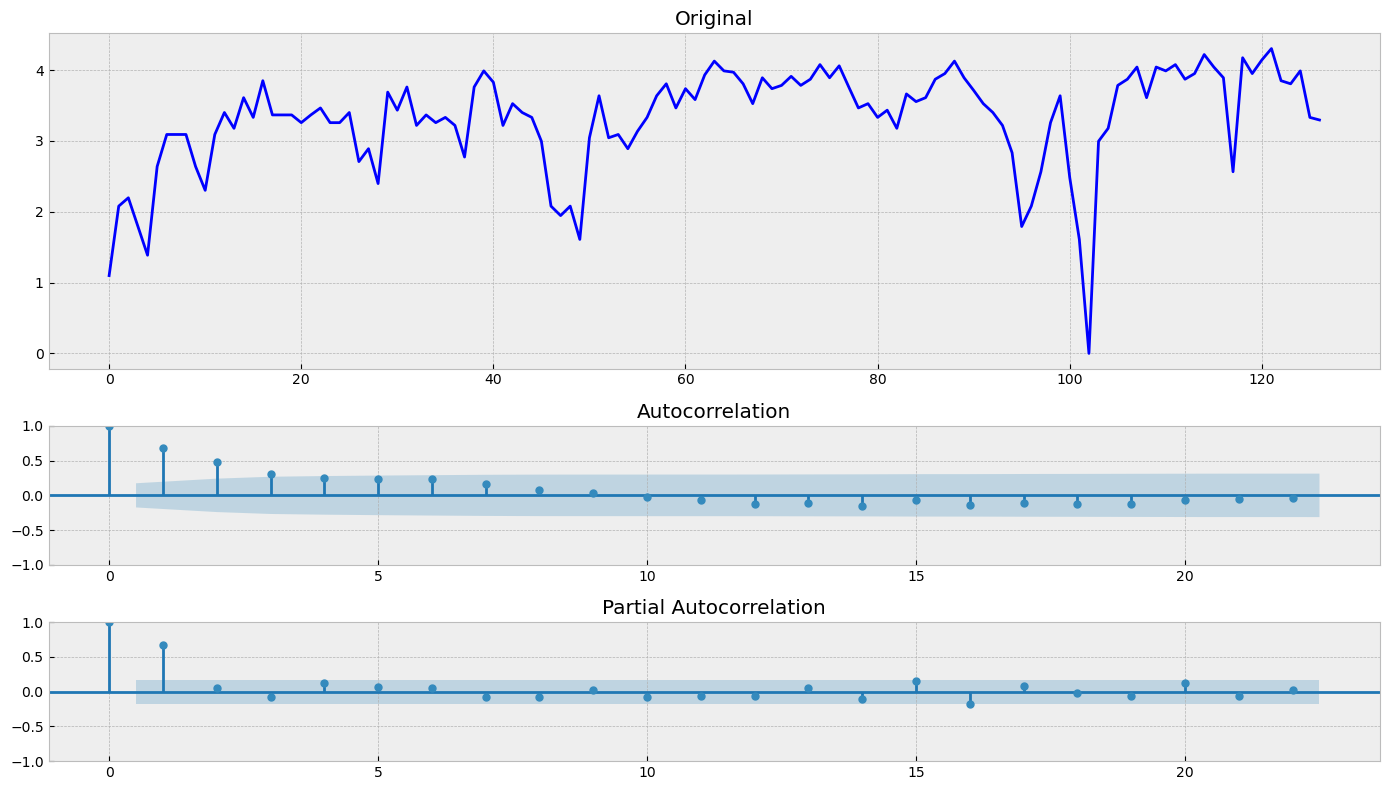

In [44]:
series_diff = series.diff(12).dropna()  # Убираем тренд
series_log = boxcox(series_diff, 0)
mask = ~(np.isnan(series_log) | np.isinf(series_log))
data_clean = series_log[mask]
tsplot(data_clean)

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


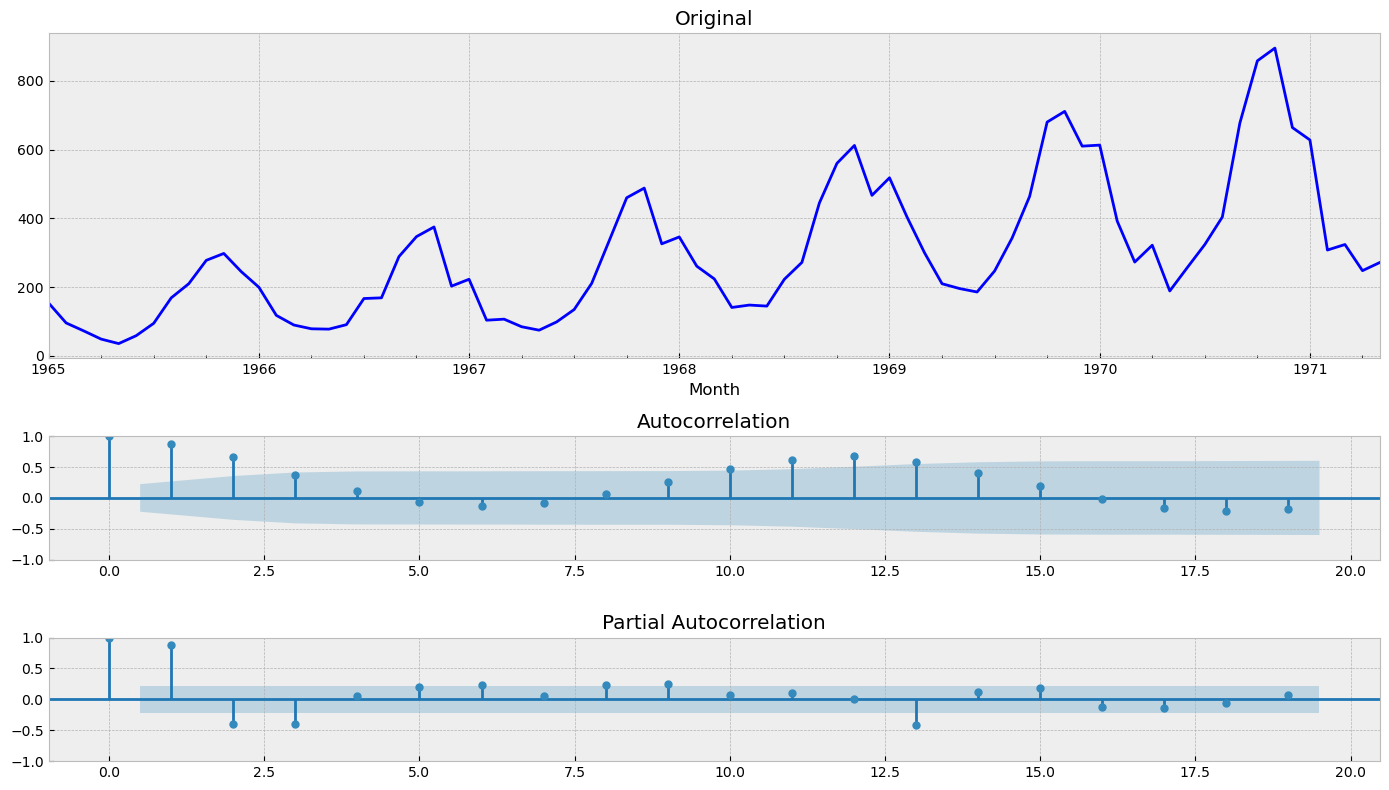

In [46]:
series = all_series["Monthly sales of company X"]
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                 -4.160344
p-value                         0.000768
#Lags Used                      2.000000
Number of Observations Used    52.000000
Critical Value (1%)            -3.562879
Critical Value (5%)            -2.918973
Critical Value (10%)           -2.597393
dtype: float64


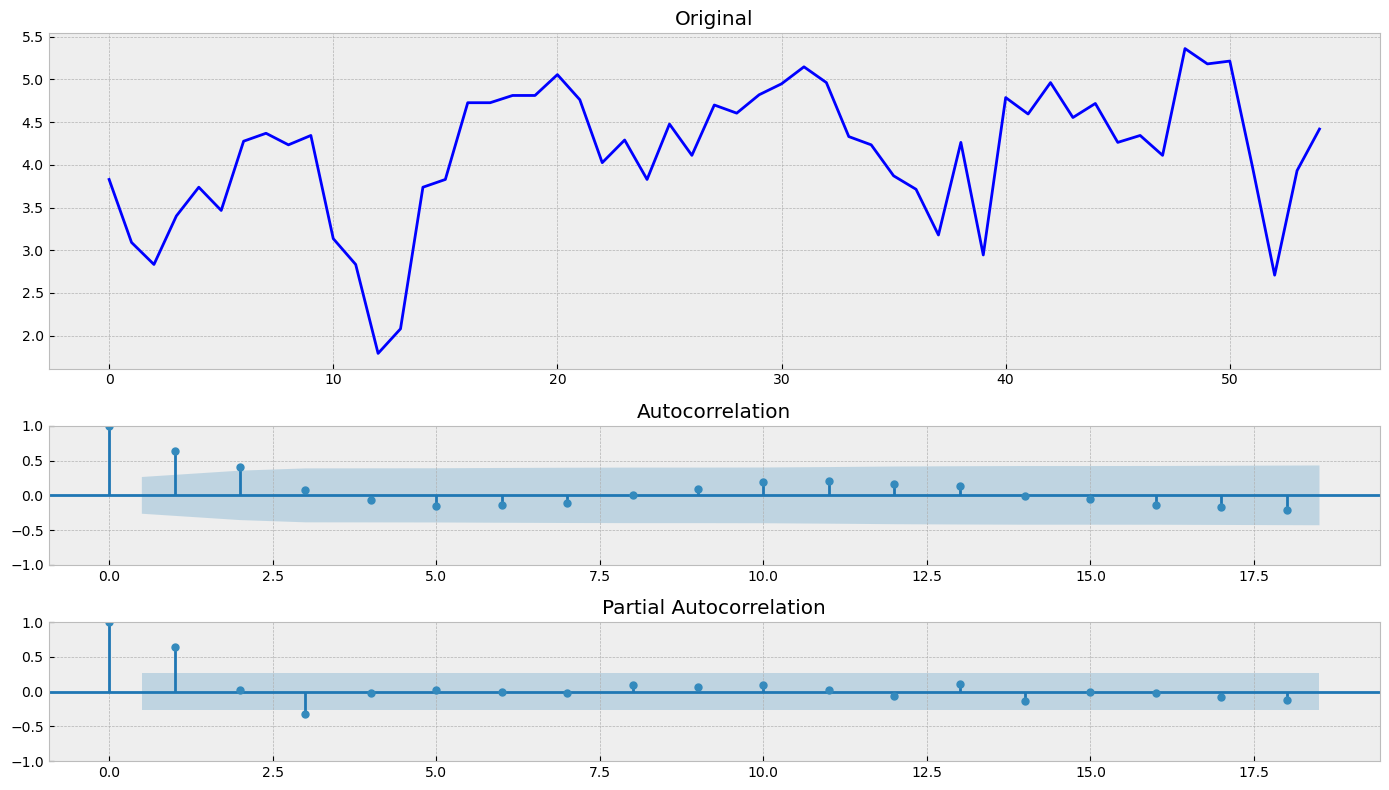

In [47]:
series_diff = series.diff(12).dropna()  # Убираем тренд
series_log = boxcox(series_diff, 0)
mask = ~(np.isnan(series_log) | np.isinf(series_log))
data_clean = series_log[mask]
tsplot(data_clean)